# Machine Learning Models

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [268]:
## classification ml:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [269]:
## regression ml
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree.export import export_text
from sklearn.neighbors import KNeighborsRegressor

In [270]:
### evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [271]:
### optimize model
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, FastICA

In [272]:
ds = pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

In [273]:
#subsets
background = ['PB140: YEAR OF BIRTH','PB150: SEX','PB190: MARITAL STATUS','PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']

education = ['PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED']

work = ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK', 'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION']

health = ['PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']

job= ['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
      "PY090G++: SOCIAL BENEFITS"]
jobdiff=['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']


bneeds= ['PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home']


sat =['PW010: OVERALL LIFE SATISFACTION', 'PW020: MEANING OF LIFE',
       'PW030: SATISFACTION WITH FINANCIAL SITUATION',
       'PW040: SATISFACTION WITH ACCOMMODATION', 'PW050: BEING VERY NERVOUS',
       'PW060: FEELING DOWN IN THE DUMPS', 'PW070: FEELING CALM AND PEACEFUL',
       'PW080: FEELING DOWNHEARTED OR DEPRESSED', 'PW090: BEING HAPPY',
       'PW120: SATISFACTION WITH TIME USE',
       'PW130: TRUST IN THE POLITICAL SYSTEM',
       'PW140: TRUST IN THE LEGAL SYSTEM', 'PW150: TRUST IN THE POLICE',
       'PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS',
       'PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)',
       'PW180: HELP FROM OTHERS', 'PW190: TRUST IN OTHERS',
       'PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS',
       'PW210: SATISFACTION WITH LIVING ENVIRONMENT',
       'PW220: PHYSICAL SECURITY']

subsets= [background,education,work,health,job,bneeds, sat]
columns = []
for x in subsets:
    for y in x:
        columns.append (y)
columns

['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PL150: MANAGERIAL POSITION',
 'PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
 'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
 'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
 'PY090G++: SOCIAL BENEFITS',
 'PD020: Replace worn-out clothes by some new (not second-hand) ones',
 'PD030: Two pairs of properly fitting shoes',
 'PD050: Get-together with friends/fami

# 0 Superfunctions

In [303]:
### generate tests
def generateTest (X_interested,y_interested, dummy, drop_na_in_y, binning, scalertouse):
    outcome = ds[y_interested]
    features = ds[X_interested]
    outcomelist=y_interested
    featureslist=X_interested
    data =pd.merge(features, outcome, left_index=True, right_index=True)
    
    # create dummy
    categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]

    create_dummy=set(featureslist).intersection(categorical)
    data_dummy = pd.get_dummies(data, columns=create_dummy, drop_first=True)
    if dummy=='yes':
        data = data_dummy
    
    ## drop na in outcome
    if drop_na_in_y == 'yes':
        data = data[data[outcomelist]>=0]
    
    ## split dataset again in x and y
    XCol=list(data.columns)
    XCol.remove(outcomelist)
    YCol=outcomelist
    Xtouse = data[XCol]
    y= data[YCol]
    
    ## binning
    y_binned=y.apply(lambda x: 4.5 if (x <=5) & (x!=-1) else x)
    y_binned =y_binned.apply(lambda x: 6.5 if ((x ==6) | (x==7)) else x)
    if binning == 'yes':
        y = y_binned

    
    # scaler
    if scalertouse == "Standard":
        scaler = StandardScaler()
        X_ = scaler.fit_transform(Xtouse)
    elif scalertouse == "MinMax":
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_ = scaler.fit_transform(Xtouse)
        X_.shape
    else: 
        X_ = Xtouse
    
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
    train = pd.merge(X_train, y_train, left_index=True, right_index=True)
    return X_train, X_test, y_train, y_test

## 0.1  Regression

In [274]:
# maxximize function to split and run all the models:

def runmodels (X_interested,y_interested, dummy, drop_na_in_y, binning, scalertouse):
    outcome = ds[y_interested]
    features = ds[X_interested]
    outcomelist=y_interested
    featureslist=X_interested
    data =pd.merge(features, outcome, left_index=True, right_index=True)
    
    # create dummy
    categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]

    create_dummy=set(featureslist).intersection(categorical)
    data_dummy = pd.get_dummies(data, columns=create_dummy, drop_first=True)
    if dummy=='yes':
        data = data_dummy
    
    ## drop na in outcome
    if drop_na_in_y == 'yes':
        data = data[data[outcomelist]>=0]
    
    ## split dataset again in x and y
    XCol=list(data.columns)
    XCol.remove(outcomelist)
    YCol=outcomelist
    Xtouse = data[XCol]
    y= data[YCol]
    
    ## binning
    y_binned=y.apply(lambda x: 4.5 if (x <=5) & (x!=-1) else x)
    y_binned =y_binned.apply(lambda x: 6.5 if ((x ==6) | (x==7)) else x)
    if binning == 'yes':
        y = y_binned

    
    # scaler
    if scalertouse == "Standard":
        scaler = StandardScaler()
        X_ = scaler.fit_transform(Xtouse)
    elif scalertouse == "MinMax":
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_ = scaler.fit_transform(Xtouse)
        X_.shape
    else: 
        X_ = Xtouse
    
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
    
    print("X: ", Xtouse.columns)
    print("Y: ", outcomelist,"\n")
    
    # Linear Regression
    lm = LinearRegression()
    model = lm.fit(X_train,y_train)

    print("Intercept: ", lm.intercept_)
    print("Coef: ", lm.coef_)

    y_pred  = lm.predict(X_test)
    print ("linear aMSE: ", mean_absolute_error(y_test, y_pred))
    print ("linear MSE: ",mean_squared_error(y_test, y_pred))
    print ("linear R2: ",r2_score(y_test, y_pred), "\n")
    
    
    ### Regression Tree
    regr = DecisionTreeRegressor(random_state = 29)
    model = regr.fit(X_train, y_train)
    y_pred  = regr.predict(X_test)
    regr.score(X_test, y_test)
    print ("Regression Tree aMSE: ", mean_absolute_error(y_test, y_pred))
    print ("Regression Tree MSE: ",mean_squared_error(y_test, y_pred))
    print ("Regression Tree R2: ",r2_score(y_test, y_pred),"\n")
    
    ### KNeighborsRegressor
    knnr = KNeighborsRegressor(n_neighbors = 3)
    model = knnr.fit(X_train, y_train)  #fit the model
    y_pred = knnr.predict(X_test)
    print ("KNeighbores aMSE: ", mean_absolute_error(y_test, y_pred))
    print ("KNeighbores MSE: ",mean_squared_error(y_test, y_pred))
    print ("KNeighbores R2: ",r2_score(y_test, y_pred))

In [275]:
runmodels(bneeds,'PW130: TRUST IN THE POLITICAL SYSTEM', 'yes', 'yes', 'yes', 'no')

X:  Index(['PD020: Replace worn-out clothes by some new (not second-hand) ones_2.0',
       'PD080: Internet connection for personal use at home_2.0',
       'PD060: Regularly participate in a leisure activity_2.0',
       'PD070: Spend a small amount of money each week on yourself_2.0',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month_2.0',
       'PD030: Two pairs of properly fitting shoes_2.0'],
      dtype='object')
Y:  PW130: TRUST IN THE POLITICAL SYSTEM 

Intercept:  5.72378563497196
Coef:  [ 0.02007966  0.02412887 -0.018617   -0.03242282  0.027231   -0.06948421]
linear aMSE:  1.4115703460432991
linear MSE:  2.5577299974039036
linear R2:  -0.0008263710791276413 

Regression Tree aMSE:  1.4104620725528818
Regression Tree MSE:  2.570188669992055
Regression Tree R2:  -0.005701384504125162 

KNeighbores aMSE:  1.4032941425696428
KNeighbores MSE:  3.6625445750803234
KNeighbores R2:  -0.43313453715354666


## 0.1  Classification

In [276]:
# maxximize function to split and run all the models:

def runmclass (X_interested,y_interested, dummy, drop_na_in_y, binning_value, scalertouse):
    outcome = ds[y_interested]
    features = ds[X_interested]
    outcomelist=y_interested
    featureslist=X_interested
    data =pd.merge(features, outcome, left_index=True, right_index=True)
    
    # create dummy
    categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]

    create_dummy=set(featureslist).intersection(categorical)
    data_dummy = pd.get_dummies(data, columns=create_dummy, drop_first=True)
    if dummy=='yes':
        data = data_dummy
    
    ## drop na in outcome
    if drop_na_in_y == 'yes':
        data = data[data[outcomelist]>=0]
    
    ## split dataset again in x and y
    XCol=list(data.columns)
    XCol.remove(outcomelist)
    YCol=outcomelist
    Xtouse = data[XCol]
    y= data[YCol]
    
    ## binning
    y_binned=y.apply(lambda x: 0 if (x <=binning_value) else 1)
    y = y_binned
    print(y.value_counts(normalize=True))

    
    # scaler
    if scalertouse == "Standard":
        scaler = StandardScaler()
        X_ = scaler.fit_transform(Xtouse)
    elif scalertouse == "MinMax":
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_ = scaler.fit_transform(Xtouse)
        X_.shape
    else: 
        X_ = Xtouse
    
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
    
    print("X: ", Xtouse.columns)
    print("Y: ", outcomelist,"\n")
    
    # logistic regression
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    conf=confusion_matrix(y_test, y_pred)
    tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    matrix = pd.DataFrame([[tp, tn, (tp+tn),round((tp+tn)/(tp+tn+fp+fn)*100,2)],[fp, fn, (fp+fn), ]], index = ["true", "false"], columns=['positive', 'negative', 'total','accuracy'])
    print(matrix)
    print( "Logistic regression - accuracy: ", str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
    print( "Logistic regression - precision", str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)), "\n")

    # Decision Tree classyier
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    conf=confusion_matrix(y_test, y_pred)
    tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    matrix = pd.DataFrame([[tp, tn, (tp+tn),round((tp+tn)/(tp+tn+fp+fn)*100,2)],[fp, fn, (fp+fn), ]], index = ["true", "false"], columns=['positive', 'negative', 'total','accuracy'])
    print(matrix)
    print( "Decision tree - accuracy  ", str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
    print( "Decision tree - precision", str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)), "\n")  
      
    # super vector machine (takes too much time)                                          
                                                   
    # KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    conf=confusion_matrix(y_test, y_pred)
    tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    matrix = pd.DataFrame([[tp, tn, (tp+tn),round((tp+tn)/(tp+tn+fp+fn)*100,2)],[fp, fn, (fp+fn), ]], index = ["true", "false"], columns=['positive', 'negative', 'total','accuracy'])
    print(matrix)
    print( "KNeighborsClassifier - accuracy  ", str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
    print( "KNeighborsClassifier - precision", str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)), "\n") 

In [277]:
runmclass(background, 'PW130: TRUST IN THE POLITICAL SYSTEM', 'yes' , 'yes', 5, 'MaxMin')

0    0.573735
1    0.426265
Name: PW130: TRUST IN THE POLITICAL SYSTEM, dtype: float64
X:  Index(['PB140: YEAR OF BIRTH', 'PB200: CONSENSUAL UNION_2',
       'PB200: CONSENSUAL UNION_3', 'PB220A: CITIZENSHIP_1', 'PB150: SEX_2',
       'PB190: MARITAL STATUS_2.0', 'PB190: MARITAL STATUS_3.0',
       'PB190: MARITAL STATUS_4.0', 'PB190: MARITAL STATUS_5.0'],
      dtype='object')
Y:  PW130: TRUST IN THE POLITICAL SYSTEM 

       positive  negative  total  accuracy
true          0      1778   1778      56.5
false         0      1369   1369       NaN
Logistic regression - accuracy:  56.5
Logistic regression - precision 56.5 

       positive  negative  total  accuracy
true        290      1374   1664     52.88
false       404      1079   1483       NaN
Decision tree - accuracy   52.88
Decision tree - precision 56.01 



C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


       positive  negative  total  accuracy
true        256      1472   1728     54.91
false       306      1113   1419       NaN
KNeighborsClassifier - accuracy   54.91
KNeighborsClassifier - precision 56.94 



# Stepwise
# 1 Data Selection and Preperation

#### 1.1. define features and Y

In [278]:
outcome = ds['PW010: OVERALL LIFE SATISFACTION']
features = ds[background]
outcomelist='PW010: OVERALL LIFE SATISFACTION'
featureslist=background

In [279]:
data =pd.merge(features, outcome, left_index=True, right_index=True)

In [280]:
data.head()

,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PW010: OVERALL LIFE SATISFACTION
0,1977,1,2.0,3,0,8.0
1,1936,1,2.0,1,0,7.0
2,1952,2,2.0,3,0,7.0
3,1938,2,2.0,3,0,6.0
4,1950,2,5.0,3,0,10.0


#### 1.2 make lefts skewed X categorical

In [281]:
shouldbecategorical= main_list = list(set(data.columns)-set(categorical)-set([outcomelist]))

In [282]:
shouldbecategorical

['PB140: YEAR OF BIRTH']

#### 1.3 create dummies

In [283]:
categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]

create_dummy=set(featureslist).intersection(categorical)

data_dummy = pd.get_dummies(data, columns=create_dummy, drop_first=True)
data_dummy.columns

Index(['PB140: YEAR OF BIRTH', 'PW010: OVERALL LIFE SATISFACTION',
       'PB200: CONSENSUAL UNION_2', 'PB200: CONSENSUAL UNION_3',
       'PB220A: CITIZENSHIP_1', 'PB150: SEX_2', 'PB190: MARITAL STATUS_2.0',
       'PB190: MARITAL STATUS_3.0', 'PB190: MARITAL STATUS_4.0',
       'PB190: MARITAL STATUS_5.0'],
      dtype='object')

In [284]:
# use dummy:
data = data_dummy

# not use dummy:
#data = data =pd.merge(features, outcome, left_index=True, right_index=True)

# 2. Regression

#### <font color=red>here decide to keep or drop nan in the outcome: </font>

In [285]:
## drop nan
#data = data[data[outcomelist]>=0]

#reset 
#data = data =pd.merge(features, outcome, left_index=True, right_index=True)

In [286]:
XCol=list(data.columns)
XCol.remove(outcomelist)
YCol=outcomelist

In [287]:
X = data[XCol]
y= data[YCol]

•	imbalance checking (undersampling, oversamplingML umbalanced data lib)

•	Split --> X_tr, y_tr, / X_ts,  y_ts

•	Try few models (with different algorithms) (<-- pipeline)

    –	Initialization

    –	Fit / predict

    –	Evaluation (overfitting / underfitting)

•	Choose best option based on requirements

•	Optimize the model

    –	Cross -validation

    –	Try few models (with same way to approach problem)

        o	Init

        o	Fit.(predict)

        o	Evaluation

    –	Hpyertuning


### 2.1 Test for imbalancing in Y

In [288]:
YCol

'PW010: OVERALL LIFE SATISFACTION'

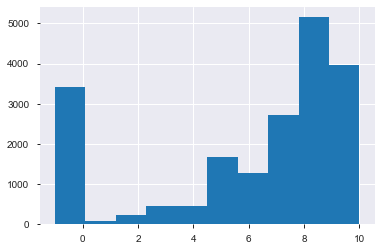

In [289]:
y.hist()

## it is very imbalanced  --> bin the values bellow 5 and change *dont know" to other value

In [290]:
#y.loc[(y['PW130: TRUST IN THE POLITICAL SYSTEM']==-1), 'PW130: TRUST IN THE POLITICAL SYSTEM']= X

#### <font color=red>here decide how to bin y: </font>

In [291]:
y_binned=y.apply(lambda x: 4.5 if (x <=5) & (x!=-1) else x)
y_binned =y_binned.apply(lambda x: 6.5 if ((x ==6) | (x==7)) else x)
y_binned.unique()

array([ 8. ,  6.5, 10. ,  4.5, -1. ,  9. ])

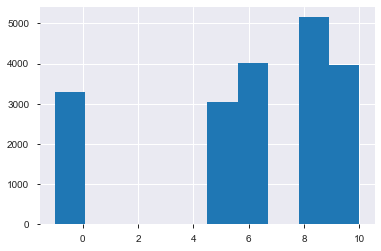

In [292]:
y_binned.hist()


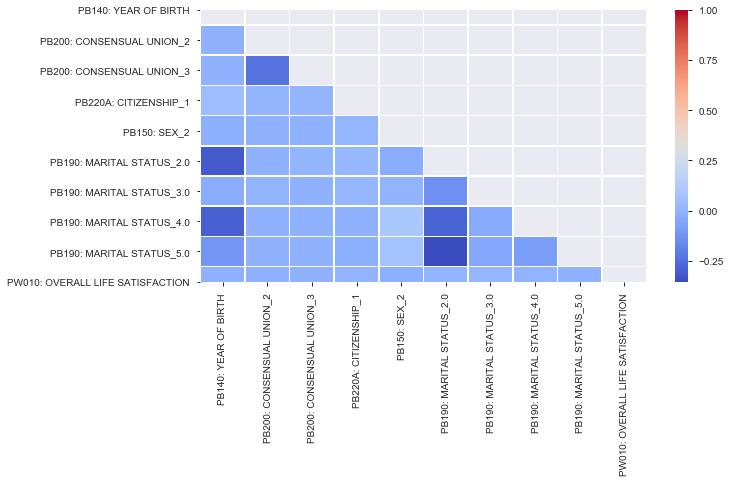

In [293]:
### just to check correlation
dset = pd.merge(X, y, left_index=True, right_index=True)


plt.figure(figsize =(10,5))
corr = dset.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = False, linewidth=0.5, mask=mask)

## 2.2 Define function to scale and run different models

## 2.3 Stepwise Scaling and running models

### 2.2.1. Scale and split dataset

#### <font color=red>here decide to scale x or not and if yes which one: </font>

In [294]:
### scaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape
X.columns

Index(['PB140: YEAR OF BIRTH', 'PB200: CONSENSUAL UNION_2',
       'PB200: CONSENSUAL UNION_3', 'PB220A: CITIZENSHIP_1', 'PB150: SEX_2',
       'PB190: MARITAL STATUS_2.0', 'PB190: MARITAL STATUS_3.0',
       'PB190: MARITAL STATUS_4.0', 'PB190: MARITAL STATUS_5.0'],
      dtype='object')

In [295]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_minmax = scaler.fit_transform(X)
X_minmax.shape


(19463, 9)

### 2.3.2 Split

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, ytogo, test_size=0.2)

NameError: name 'ytogo' is not defined

### 2.3.2 run different models

#### a) Prepare Model 

In [ ]:
## prepare interaction term
for d in range(2):
    interaction = PolynomialFeatures(degree = d, include_bias = False, interaction_only = True)
    X_inter = interaction.fit_transform(X_train)

#### b)  Linear Regression Model

In [ ]:

lm = LinearRegression()
model = lm.fit(X_train,y_train)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

y_pred  = lm.predict(X_test)


In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

#### c)  Taylor (pipeline)

#for k in range(1,8):
poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=3, include_bias = False, interaction_only = True), LinearRegression())

model = poly_model.fit(X_train, y_train)

    
print(poly_model.score(X_test, y_test))

y_pred  = poly_model.predict(X_test)


In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

#### c)  Regression Tree

In [ ]:
regr = DecisionTreeRegressor(random_state = 29)

model = regr.fit(X_train, y_train)

y_pred  = regr.predict(X_test)
regr.score(X_test, y_test)

In [ ]:
#r = export_text(regr, feature_names=list(X.columns))
#print(r)

In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)


In the rare cases you get a negative r squared value, you should probably rethink your regression analysis, especially if you are forcing an intercept.

#### d)  KNeighborsRegressor

In [ ]:
knnr = KNeighborsRegressor(n_neighbors = 3)

model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)


In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

#### <font color=red>huge means squared_error and negative r squared for binned and unbinned y
     also failed with drop nan, but way better!
    also failed with feature elimination

</font>

# 2.2 optimize recursive feature elimination (RFE)

In [ ]:
## recursive feature elimination.
# initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [298]:
generateTest(columns[:-20],outcomelist, 'yes', 'yes', 'yes', 'no')[0]

,PB140: YEAR OF BIRTH,PE040: HIGHEST ISCED LEVEL ATTAINED,PH010: GENERAL HEALTH,PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION,PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME,PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS,PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS,PY090G++: SOCIAL BENEFITS,PL051: OCCUPATION (ISCO-08 (COM))_11.0,PL051: OCCUPATION (ISCO-08 (COM))_12.0,...,PD070: Spend a small amount of money each week on yourself_2.0,PE010: CURRENT EDUCATION ACTIVITY_2,PL150: MANAGERIAL POSITION_1.0,PL150: MANAGERIAL POSITION_2.0,PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month_2.0,PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK_2,PB200: CONSENSUAL UNION_2,PB200: CONSENSUAL UNION_3,PD030: Two pairs of properly fitting shoes_2.0,PB220A: CITIZENSHIP_1
2742,1996,2.0,2.0,2.0,0.00,0,0.0,0.00,0,0,...,0,1,0,0,0,0,0,1,0,0
17247,1932,3.0,2.0,2.0,7373.82,0,0.0,13883.65,0,0,...,0,1,0,1,0,0,0,1,0,0
14277,1962,3.0,2.0,-1.0,83893.75,773,0.0,0.00,0,0,...,1,1,0,1,0,0,0,0,0,0
20959,1989,4.0,2.0,1.0,6684.84,3445,0.0,0.00,0,0,...,0,1,0,0,0,1,0,1,0,0
14527,1932,3.0,3.0,2.0,8991.49,0,0.0,9997.78,0,0,...,1,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18741,1939,3.0,2.0,2.0,4890.00,0,0.0,20664.52,0,0,...,0,1,0,1,0,0,0,0,0,0
8637,1958,5.0,2.0,1.0,52163.07,2436,0.0,0.00,0,0,...,1,0,0,1,1,0,0,1,0,0
9647,1944,5.0,2.0,2.0,0.00,2250,0.0,6788.76,0,0,...,0,1,0,1,0,0,0,0,0,0
7541,1942,5.0,2.0,2.0,1950.60,0,0.0,24821.73,0,0,...,0,1,0,1,0,0,0,0,0,0


Fit the model and print the ranking

In [299]:
# Your code here:
auto_model = LinearRegression()
selector = RFE(auto_model, 5, step=1)
model = selector.fit(generateTest(columns[:-20],outcomelist, 'yes', 'yes', 'yes', 'no')[0],generateTest(columns[:-20],outcomelist, 'yes', 'yes', 'yes', 'no')[2])

In [300]:
# Your code here:
selector.ranking_
#selector.support_

array([67, 64, 63, 55, 75, 74, 73, 76, 25, 38, 56, 28,  5, 23, 21,  3, 14,
       22, 26, 13, 61, 50,  1, 12, 10, 51,  2,  7, 11,  6, 66, 37,  8, 33,
       15, 68,  9,  1, 30,  4, 24,  1, 69, 70,  1, 48, 27, 43, 17, 36, 47,
       46, 35, 58, 34, 59, 65, 32, 40, 31,  1, 57, 29, 45, 44, 19, 18, 16,
       20, 60, 71, 54, 41, 42, 49, 72, 39, 62, 52, 53])

In [301]:
test = [x if x <=10 else "" for x in selector.ranking_]
len(test)

80

In [302]:
Xhere = generateTest(columns[:-20],outcomelist, 'yes', 'yes', 'yes', 'no')[0]
rfe_col = []
for x in range(len(Xhere.columns)):
    if selector.ranking_[x]<=10:
        rfe_col.append(Xhere.columns[x])
print(len(rfe_col))
rfe_col

14


['PL051: OCCUPATION (ISCO-08 (COM))_21.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_24.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_35.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_42.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_44.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_51.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_53.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_62.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_74.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_75.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_82.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_91.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_94.0',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_11.0']

In [1210]:
X=data[columns]
X.columns

Index(['PB030: PERSONAL ID', 'PB140: YEAR OF BIRTH', 'PB150: SEX',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL150: MANAGERIAL POSITION', 'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G++: SOCIAL BENEFITS'],
      dtype='object')

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


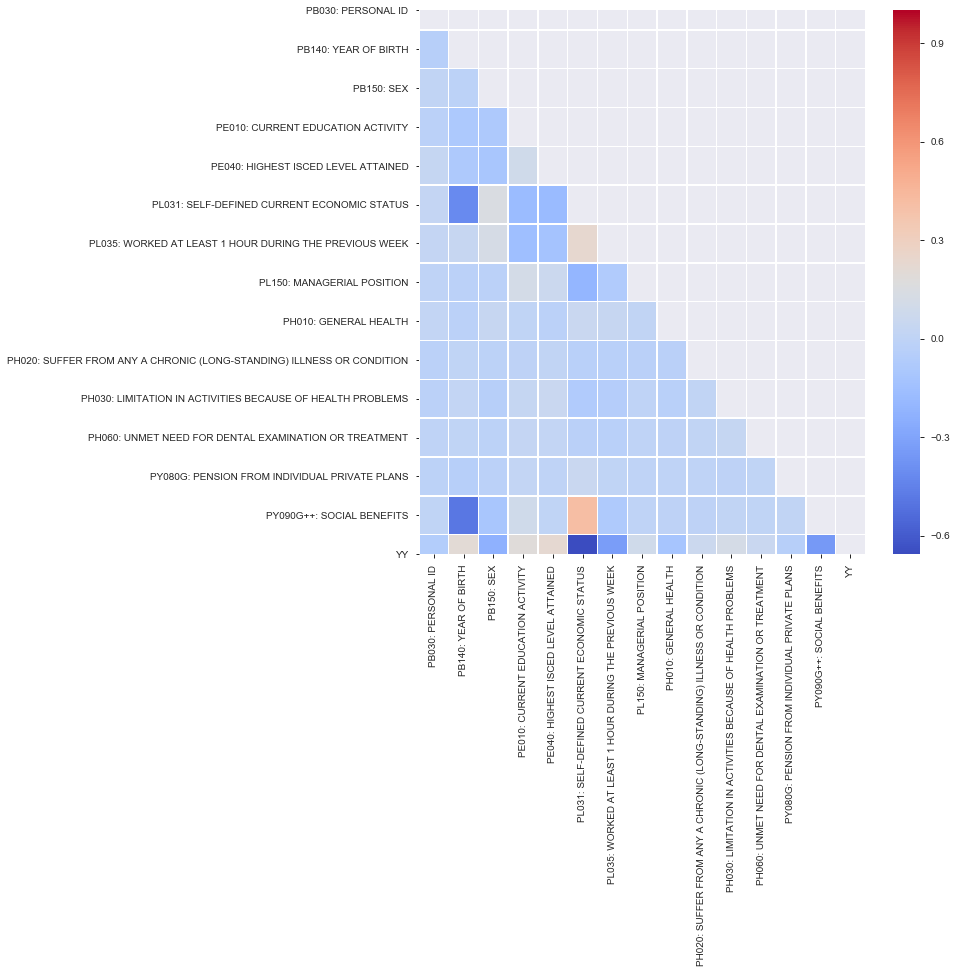

In [1211]:
test = X
test['YY'] = ytogo
plt.figure(figsize =(10,10))
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = False, linewidth=0.5, mask=mask)
## --> run 2.2 split and 2.3 models again

## 2.3 PCA

In [1121]:
X = data[XCol]
X.shape

(15732, 28)

In [1122]:
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# ica = FastI-CA(n_components=0.99, whit-en=True)

# Conduct PCA
features_pca = pca.fit_transform(X)

In [1123]:
X= features_pca
X.shape
## --> run 2.2 split and 2.3 models again

(15732, 1)

## 2. Classification

## 2.1 first try

### 2.1.1 prepare data

In [1124]:
# change outcome variable to a 2 classification variable:
# drop 99
# based on ds_1
data = ds_1

data =data[data['PW130: TRUST IN THE POLITICAL SYSTEM']!=-1]
data.shape
ds_1.shape[0]-data.shape[0]

3731

In [1125]:
data['Y_class']= data['PW130: TRUST IN THE POLITICAL SYSTEM'].apply(lambda x: 1 if x>=8 else 0)

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    12715
1     3017
Name: Y_class, dtype: int64

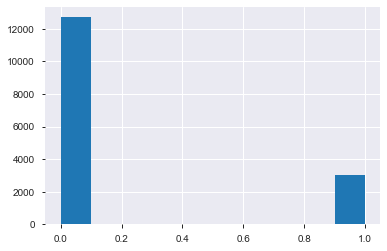

In [1126]:
data['Y_class'].hist()
data['Y_class'].value_counts()
## --> balanced more or less

In [1127]:
XCol=data.columns[:-2]
YCol=data.columns[-1]

print(len(XCol))
print(YCol)

28
Y_class


In [1128]:
X = data[XCol]
y= data[YCol]


In [1129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape
X_test.shape


(4720, 28)

#### a) Logistic Regression

In [1130]:
lr = LogisticRegression()
lr.fit(X_train,y_train)


y_pred=lr.predict(X_test)

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1131]:
acc = lr.score(X_test,y_test)
acc

0.8091101694915255

In [1132]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

tn,fp,fn,tp = confusion_matrix(y_test, y_pred).flatten()
### it predicts all as 1...

accuracy: 80.91
precision: 80.91


#### b) DecisionTree Classify

In [1133]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [1134]:
acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")

Decision Tree Test Accuracy 67.65%


In [1135]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

accuracy: 67.65
precision: 81.02


array([[2993,  826],
       [ 701,  200]], dtype=int64)

In [1136]:
## overfitting!!!

#### c) Support Vector Maschine

In [1137]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [1138]:
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

SVM Algorithm Test Accuracy 80.91%


In [1139]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

accuracy: 80.91
precision: 80.91


#### d) K-Nearest Neighbour

In [1140]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [1141]:
acc = knn.score(X_test, y_test)*100
acc

79.04661016949153

In [1142]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))


accuracy: 79.05
precision: 81.06


Sammelsurium zum optimieren:
- dummies für social benefits einzelne
- die einzelnen social benefits brauchen
- log from y!